In [1]:
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, '/Users/szczekulskij/side_projects/long-term-analysis-of-pws')
from src.generate_df import get_data_df
from src.graphs import graph_agg_metric_over_nr_sessions, graph_based_on_time_bucket
from src.anovas import bucketed_anova

# Main graphs:

Text(0, 0.5, 'mean improvement (total clearence)')

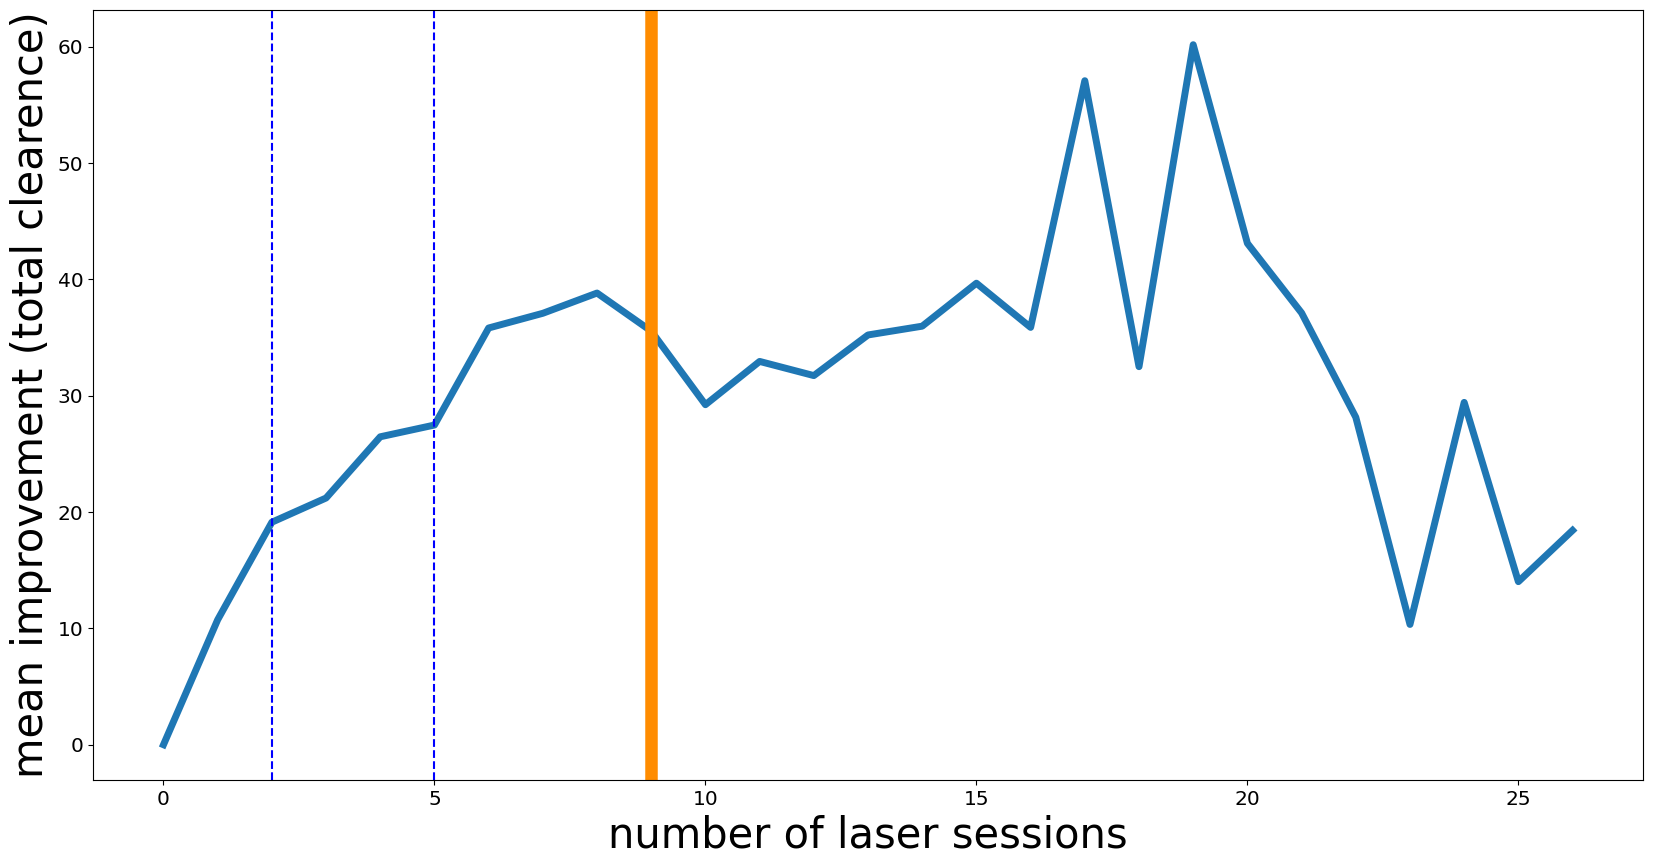

In [7]:
graph_agg_metric_over_nr_sessions("total_area_change", cut_last_x_visits = 27)
plt.axvline(x=2, color='b', linestyle='--')
plt.axvline(x=5, color='b', linestyle='--')
plt.axvline(x=9, color='darkorange', linestyle='-',  lw = 9)
plt.xlabel("number of laser sessions", size = 30)
plt.ylabel("mean improvement (total clearence)", size = 30)





anova results:
buckets: [1, 3, 6, 10, 15]
p_value: 2.672068635067671e-16

statistics between 1 - 2 bucket and 3 - 5 bucket
means: 24.95 vs 41.41
p-value: 0.0

statistics between 3 - 5 bucket and 6 - 9 bucket
means: 41.41 vs 54.43
p-value: 6e-05

statistics between 6 - 9 bucket and 10 - 14 bucket
means: 54.43 vs 53.55
p-value: 0.59677



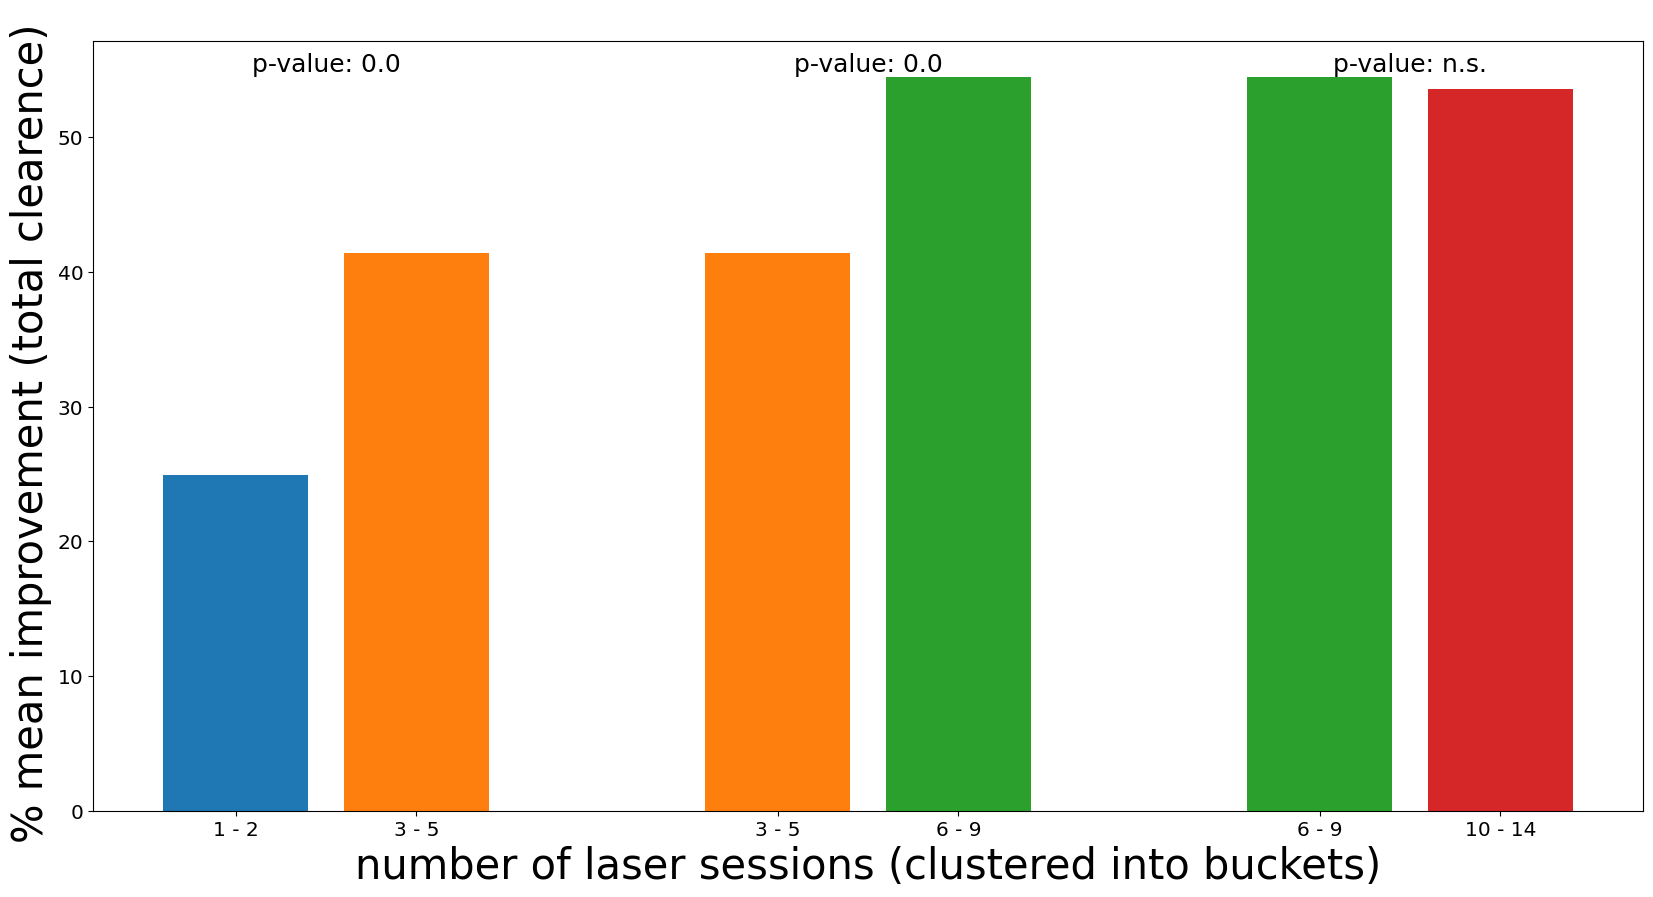

In [3]:
plt.figure(figsize=(20,10))
plt.ylabel("% mean improvement (total clearence) ", size = 30)
plt.xlabel("number of laser sessions (clustered into buckets)", size = 30)
bucketed_anova(
    bucket_column = "visit_nr",
    metric = "total_GCE",
    buckets = [1,3,6,10,15,],
    ttest_type = "less",
    p_value_text_height = 54.50
)

In [10]:
plt.figure(figsize=(20,10))
graph_based_on_time_bucket("inbetween_area_change")
plt.xlabel("Days passed betweens two consecutive visits \n(clustered into buckets)", size = 30)
plt.ylabel("% mean improvement inbetween consecutive visits", size = 30)

buckets:  [0, 120, 240, 360]
['0 - 120', '120 - 240', '240 - 360', '360+']


/usr/local/lib/python3.10/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


,bucket,patients_per_bucket
0,0 - 120,276
1,120 - 240,37
2,240 - 360,8
3,360+,11


Text(0, 0.5, '% mean improvement inbetween consecutive visits')





anova results:
buckets: [0, 90, 180, 270, 10000]
p_value: 1.99238094142645e-08

statistics between 0 - 89 bucket and 90 - 179 bucket
means: 8.74 vs 9.16
p-value: 0.54361

statistics between 90 - 179 bucket and 180 - 269 bucket
means: 9.16 vs -6.25
p-value: 0.01299

statistics between 180 - 269 bucket and 270 - 9999 bucket
means: -6.25 vs -34.7
p-value: 0.0573



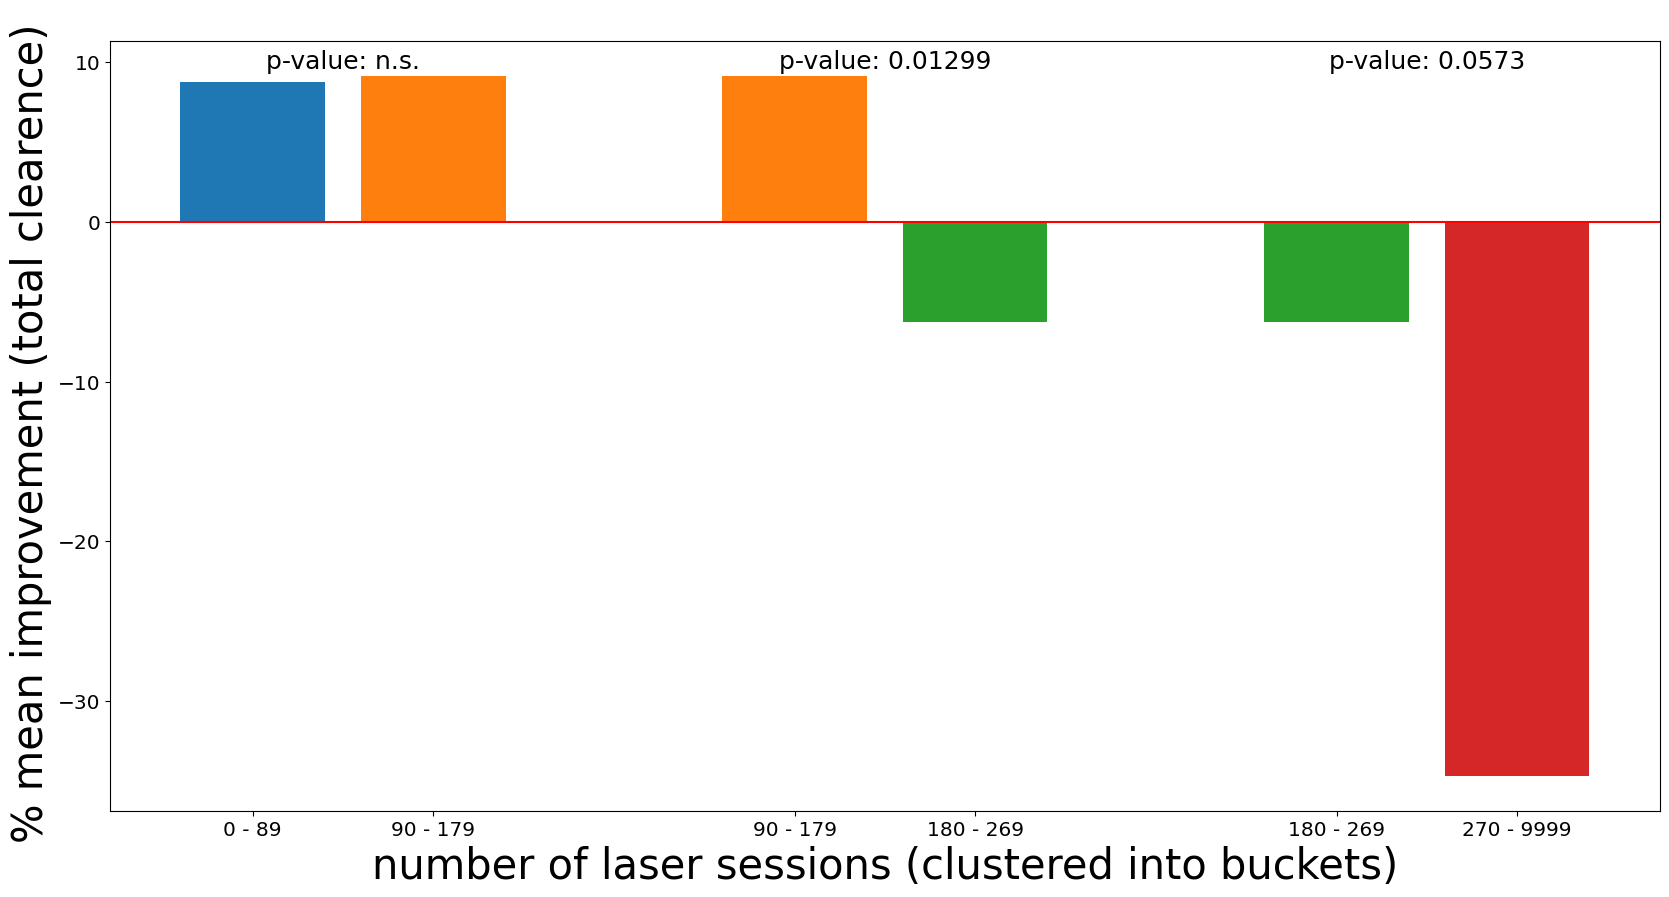

In [6]:
plt.figure(figsize=(20,10))
plt.ylabel("% mean improvement (total clearence) ", size = 30)
plt.xlabel("number of laser sessions (clustered into buckets)", size = 30)
plt.axhline(y=0, color='r', linestyle='-')
bucketed_anova(
    bucket_column = "time",
    metric = "inbetween_GCE",
    buckets = [0,90,180,270,10000],
    ttest_type = "greater",
    p_value_text_height = 9.3,
    last_bucket_label = "270+"
)